# Continuous Probabilistic Methods

In [1]:
# imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

1. Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.

### 1. Using lemonade.csv dataset and focusing on continuous variables:


In [2]:
df = pd.read_csv('lemonade.csv')
df.head()


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [6]:
df.columns = df.columns.str.lower()

temperature                                                     \
                count       mean        std   min     25%    50%     75%   
day                                                                        
Friday           52.0  61.134615  16.184426  25.3  50.225  61.50  71.175   
Monday           52.0  60.888462  17.119610  28.9  49.325  60.65  71.400   
Saturday         52.0  64.021154  26.813308  30.9  48.700  63.45  71.575   
Sunday           53.0  59.769811  17.108136  15.1  49.700  61.10  71.700   
Thursday         52.0  61.125000  15.655518  31.9  50.750  60.35  71.400   
Tuesday          52.0  59.944231  16.498288  22.0  51.625  60.95  72.050   
Wednesday        52.0  61.717308  15.253861  32.2  51.425  62.00  71.175   

                 rainfall            ... price      sales             \
             max    count      mean  ...   75%  max count       mean   
day                                  ...                               
Friday      99.3     52.0  0.817115  ...   0.5  0.5  52.0  25.384615   
Monday     102.6     52.0  0.823462  ...   0.5  0.5  52.0  29.307692   
Saturday   212.0     52.0  0.823077  ...   0.5  0.5  52.0  27.269231   
Sunday      93.4     53.0  0.873585  ...   0.5  0.5  53.0  27.094340   
Thursday    97.9     52.0  0.812500  ...   0.5  0.5  52.0  25.673077   
Tuesday     99.3     52.0  0.829423  ...   0.5  0.5  52.0  34.750000   
Wednesday   94.3     52.0  0.801731  ...   0.5  0.5  52.0  25.596154   

                                                       
                 std   min    25%   50%    75%    max  
day                                                    
Friday      7.010227  11.0  21.00  25.5  29.25   41.0  
Monday     29.913954  12.0  20.75  25.0  30.00  235.0  
Saturday   17.711318  13.0  19.75  25.0  30.00  143.0  
Sunday     19.676484   7.0  19.00  25.0  29.00  158.0  
Thursday    6.729278  13.0  21.00  25.0  30.00   43.0  
Tuesday    70.898125  10.0  21.00  25.0  30.00  534.0  
Wednesday   6.622184  12.0  20.00  25.0  30.00   41.0  

[7 rows x 40 columns]

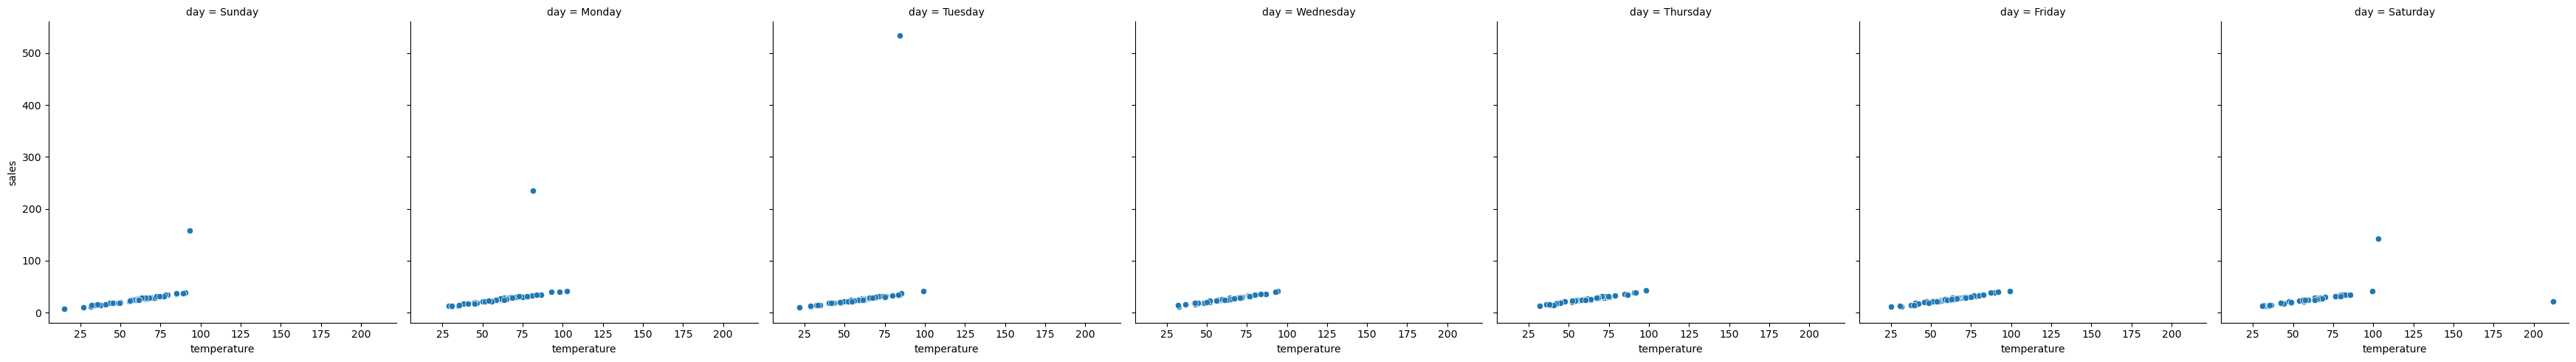

In [10]:
sns.relplot(x='temperature', y='sales', col='day', data=df)
df.groupby('day').describe()

temperature                                                     \
                count       mean        std   min     25%    50%     75%   
day                                                                        
Friday           52.0  61.134615  16.184426  25.3  50.225  61.50  71.175   
Monday           52.0  60.888462  17.119610  28.9  49.325  60.65  71.400   
Saturday         52.0  64.021154  26.813308  30.9  48.700  63.45  71.575   
Sunday           53.0  59.769811  17.108136  15.1  49.700  61.10  71.700   
Thursday         52.0  61.125000  15.655518  31.9  50.750  60.35  71.400   
Tuesday          52.0  59.944231  16.498288  22.0  51.625  60.95  72.050   
Wednesday        52.0  61.717308  15.253861  32.2  51.425  62.00  71.175   

                 rainfall            ... price      sales             \
             max    count      mean  ...   75%  max count       mean   
day                                  ...                               
Friday      99.3     52.0  0.817115  ...   0.5  0.5  52.0  25.384615   
Monday     102.6     52.0  0.823462  ...   0.5  0.5  52.0  29.307692   
Saturday   212.0     52.0  0.823077  ...   0.5  0.5  52.0  27.269231   
Sunday      93.4     53.0  0.873585  ...   0.5  0.5  53.0  27.094340   
Thursday    97.9     52.0  0.812500  ...   0.5  0.5  52.0  25.673077   
Tuesday     99.3     52.0  0.829423  ...   0.5  0.5  52.0  34.750000   
Wednesday   94.3     52.0  0.801731  ...   0.5  0.5  52.0  25.596154   

                                                       
                 std   min    25%   50%    75%    max  
day                                                    
Friday      7.010227  11.0  21.00  25.5  29.25   41.0  
Monday     29.913954  12.0  20.75  25.0  30.00  235.0  
Saturday   17.711318  13.0  19.75  25.0  30.00  143.0  
Sunday     19.676484   7.0  19.00  25.0  29.00  158.0  
Thursday    6.729278  13.0  21.00  25.0  30.00   43.0  
Tuesday    70.898125  10.0  21.00  25.0  30.00  534.0  
Wednesday   6.622184  12.0  20.00  25.0  30.00   41.0  

[7 rows x 40 columns]

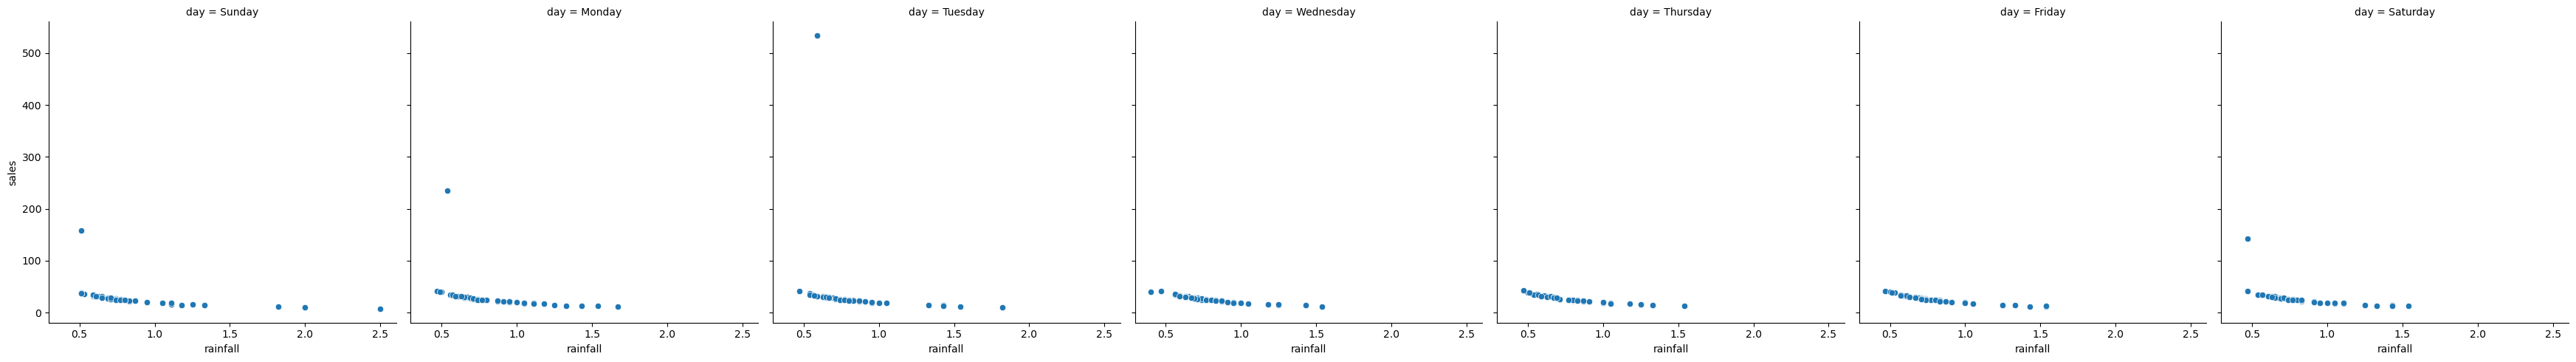

In [11]:
sns.relplot(x='rainfall', y='sales', col='day', data=df)
df.groupby('day').describe()

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,365.0,61.224658,18.085892,15.1,49.70,61.10,71.70,212.0
Rainfall,365.0,0.825973,0.273890,0.4,0.65,0.74,0.91,2.5
Flyers,365.0,40.104110,13.786445,-38.0,31.00,39.00,49.00,80.0
Price,365.0,0.500000,0.000000,0.5,0.50,0.50,0.50,0.5
Sales,365.0,27.865753,30.948132,7.0,20.00,25.00,30.00,534.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Day          365 non-null    object 
 2   Temperature  365 non-null    float64
 3   Rainfall     365 non-null    float64
 4   Flyers       365 non-null    int64  
 5   Price        365 non-null    float64
 6   Sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


* Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?


* Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?


* Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?


* Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?


### 2. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:
* Use a 2 sigma decision rule to isolate the outliers.
    * Do these make sense?
    * Should certain outliers be kept or removed?


### 3. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv